# llcolorizers

In this notebook, we would look at image representation and histograms. Also, we would implement a function for skin detection and another for to give color to images.

In [2]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

#import libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook specific to have plots appear in the notebook
%matplotlib inline

# Read in your image

Here you read in your image with cv2 using the cv2.imread(), after you define your image path, but cv reads images with the BGR colorspace (so your image will appear to have more of blue in the presentation. if your image is in the same directory as your jupyter notebook, just call the image directly with its extension binding, but if the image is in a seperate directory, define the image path 

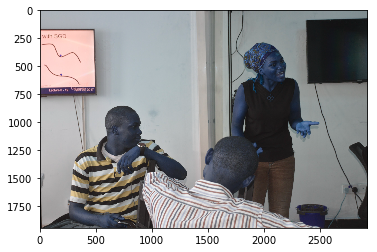

In [3]:
#img_dir = '../week03/'
#read_img = cv2.imread(img_dir+'notebook/teju.jpg', 0)

img_dir = 'teju.jpg'
read_img = cv2.imread(img_dir) #reads the image

plt.imshow(read_img) #displays the image

# Define a colorspace function

In order to set multiple colorspaces for outputing an image, a function will be set. This allows you print an image directly as an RBG, HSV or Grayscale image and can be run directly after importing the libraries 

In [6]:
img_dir = 'teju.jpg'  #this accepts the filepath

def rgb_img(img_dir):
    #reads from a BGR image file to a RGB
    img = cv2.imread(img_dir)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def hsv_img(img_dir):
    #reads from a RGB image file to a HSV array
    hsv = cv2.imread(img_dir)
    return cv2.cvtColor(hsv, cv2.COLOR_RGB2HSV)

def img_read(img_dir):
    #reads from a RGB image file to grayscale image array
    rgb = rgb_img(img_dir)
    hsv = hsv_img(img_dir)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    return rgb, hsv, gray

In [8]:
teju_rgb, teju_hsv, teju_gray = img_read(img_dir)

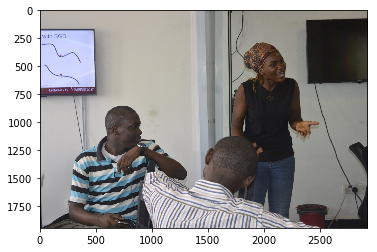

In [9]:
plt.imshow(teju_rgb) #returns a rgb colorspace

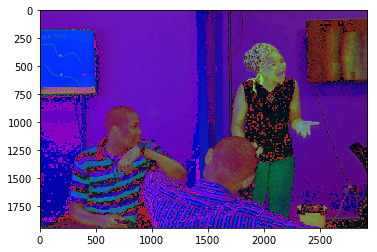

In [10]:
plt.imshow(teju_hsv)  #returns a hsv colorspace

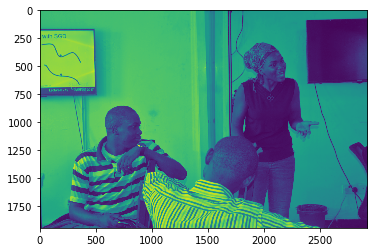

In [11]:
plt.imshow(teju_gray)  #returns a gray colorspace

A function that helps us print the RGB channels respectively 

In [14]:
def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    #helper to display an image on an axes without grid/spine
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    #helper to display an image, in grayscale, on an axes without grid/spine
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

In [15]:
# often we want to access color channels separately
# split to separate arrays per color (costly, prefer to access by indexing)
chans = r,g,b = cv2.split(teju_rgb)
restored = cv2.merge((r,g,b))

print(r.shape)

(1942, 2921)


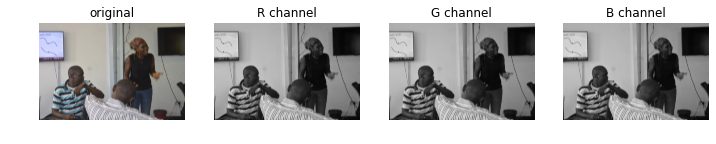

In [16]:
fig, axes = plt.subplots(1,4,figsize=(12,3))
axes = axes.flat

# handle first as special case
first_axis = next(axes)
my_show(first_axis, teju_rgb)
first_axis.set_title("original")

# display per channel images
for ax, ch, name in zip(axes, chans, ["R", "G", "B"]):
    my_gshow(ax, g)
    ax.set_title("{} channel".format(name))

# Using the Histogram

We can present our various r, g, b channels on the plot 

c:\users\user\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


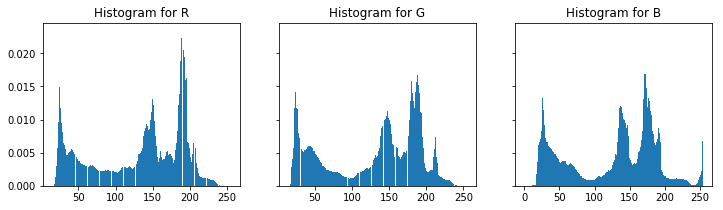

In [17]:
#plotting on matplotlib histograms
color_to_index = {"R":0, "G":1, "B":2}  # map strings to appropriate index in 

fig, axes = plt.subplots(1,3,figsize=(12,3), sharey=True)
for ax, color in zip(axes, color_to_index):
    c = color_to_index[color]
    this_channel = teju_rgb[:,:,c].ravel() # 1D view without copying 
    
    ax.hist(this_channel, 256, normed=True)
    ax.set_title("Histogram for {}".format(color))

# Testing the model on another image

In [20]:
img_dir = 'test_image.jpeg'  #this accepts the filepath

In [21]:
train_rgb, train_hsv, train_gray = img_read(img_dir)

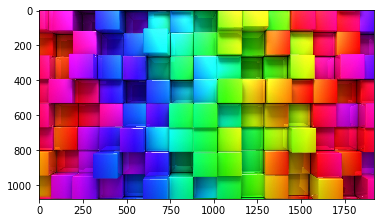

In [23]:
plt.imshow(train_rgb)

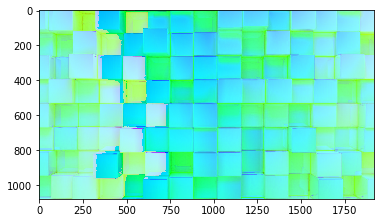

In [24]:
plt.imshow(train_hsv)

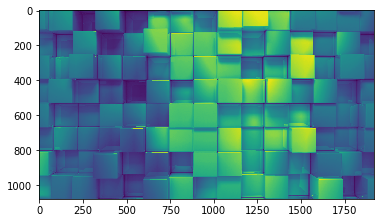

In [28]:
plt.imshow(train_gray)

we can print/express the indiviual channels by setting the vmin (minimum brightness) and vmax (maximum brightness)

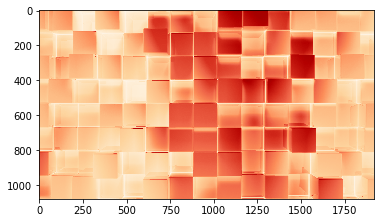

In [32]:
red_channel = plt.imshow(train_gray, cmap='OrRd', vmin = 0, vmax = 255) #red channel

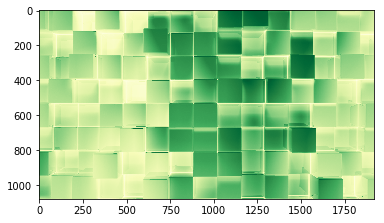

In [33]:
green_channel = plt.imshow(train_gray, cmap='YlGn', vmin = 0, vmax = 255) #green channel

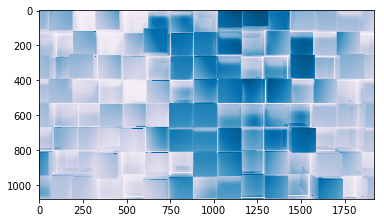

In [34]:
blue_channel = plt.imshow(train_gray, cmap='PuBu', vmin = 0, vmax = 255) #blue channel

In [38]:
# often we want to access color channels separately
# split to separate arrays per color (costly, prefer to access by indexing)
chans = red_channel, green_channel, blue_channel = cv2.split(train_rgb)
restored = cv2.merge((red_channel, green_channel, blue_channel))

print(r.shape)

(1080, 1920)


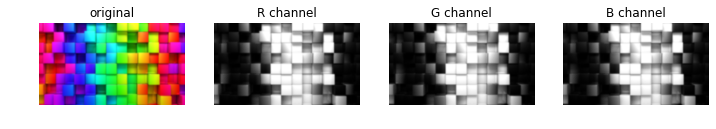

In [39]:
fig, axes = plt.subplots(1,4,figsize=(12,3))
axes = axes.flat

# handle first as special case
first_axis = next(axes)
my_show(first_axis, train_rgb)
first_axis.set_title("original")

# display per channel images
for ax, ch, name in zip(axes, chans, ["R", "G", "B"]):
    my_gshow(ax, g)
    ax.set_title("{} channel".format(name))

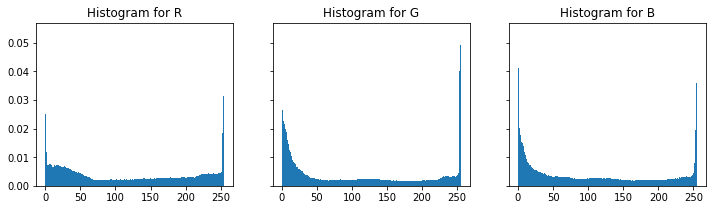

In [40]:
#plotting on matplotlib histograms
color_to_index = {"R":0, "G":1, "B":2}  # map strings to appropriate index in 

fig, axes = plt.subplots(1,3,figsize=(12,3), sharey=True)
for ax, color in zip(axes, color_to_index):
    c = color_to_index[color]
    this_channel = train_rgb[:,:,c].ravel() # 1D view without copying 
    
    ax.hist(this_channel, 256, normed=True)
    ax.set_title("Histogram for {}".format(color))

# Skin detection in images

In [59]:
img_dir = 'jer.jpg'

jer_rgb, jer_hsv, jer_gray = img_read(img_dir)

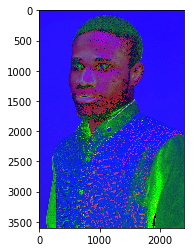

In [60]:
plt.imshow(jer_hsv)

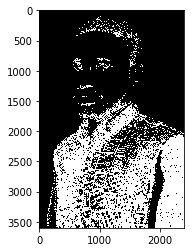

In [68]:
#skin color range for hsv color space 
HSV_mask = cv2.inRange(jer_hsv, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

plt.imshow(HSV_mask, cmap='gray', vmin=0, vmax=255)

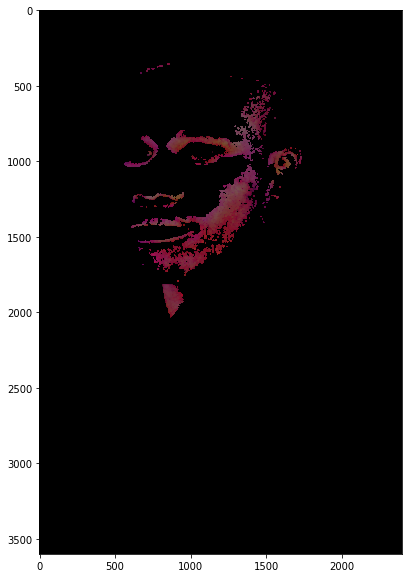

In [77]:
# skin color range in hsv
lower = np.array([0, 0, 0], dtype = "uint8")
upper = np.array([255, 100, 100], dtype = "uint8")

# TODO detect the skin pixels in the test images.
# i.e colors outside the range above
# use cv2.inRange function
skin_pixels = None
skin_pixels = cv2.inRange(jer_hsv, lower, upper)
skin_mask = np.dstack((skin_pixels, skin_pixels, skin_pixels))

# Get the image dimensions
width = jer_hsv.shape[0]
height = jer_hsv.shape[1]

# Split the image into its three channels - rgb
test_image_rgb = np.dsplit(jer_hsv, 3)
test_image_r = np.reshape(test_image_rgb[0], (width, height))
test_image_g = np.reshape(test_image_rgb[1], (width, height))
test_image_b = np.reshape(test_image_rgb[2], (width, height))

# Apply filter condition to red channel
test_image_r = np.where(test_image_r > test_image_g, test_image_r, 0)
test_image_r = np.where(test_image_r > test_image_b, test_image_r, 0)
test_image_r = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_r, 0)

# Apply filter condition to green channel
test_image_g = np.where(test_image_r > test_image_g, test_image_g, 0)
test_image_g = np.where(test_image_r > test_image_b, test_image_g, 0)
test_image_g = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_g, 0)

# Apply filter condition to blue channel
test_image_b = np.where(test_image_r > test_image_g, test_image_b, 0)
test_image_b = np.where(test_image_r > test_image_b, test_image_b, 0)
test_image_b = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_b, 0)

# Bulid image back from the three channels
test_image_rgb = np.dstack((test_image_r, test_image_g, test_image_b))

# Apply the final skin_mask threshold filter
test_image_skin = np.where(skin_mask, test_image_rgb, 0)

# Dilate and erode the image with the kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
final = cv2.morphologyEx(test_image_skin, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,10))
plt.imshow(final, cmap='gray', vmin=255, vmax=0)

In [69]:
img_dir = 'teju.jpg'

teju_rgb, teju_hsv, teju_gray = img_read(img_dir)

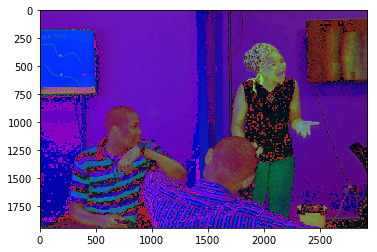

In [70]:
plt.imshow(teju_hsv)

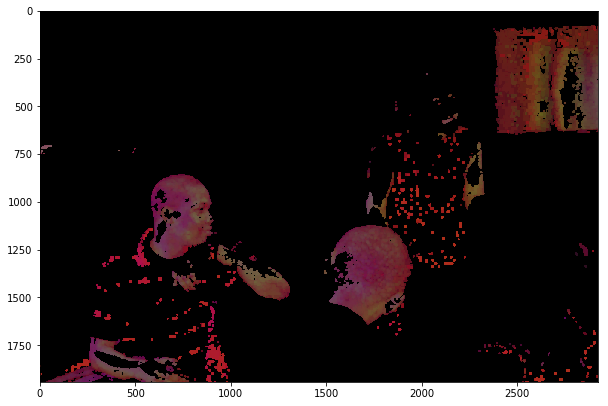

In [72]:
# skin color range in hsv
lower = np.array([0, 0, 0], dtype = "uint8")
upper = np.array([255, 100, 100], dtype = "uint8")

# TODO detect the skin pixels in the test images.
# i.e colors outside the range above
# use cv2.inRange function
skin_pixels = None
skin_pixels = cv2.inRange(teju_hsv, lower, upper)
skin_mask = np.dstack((skin_pixels, skin_pixels, skin_pixels))

# Get the image dimensions
width = teju_hsv.shape[0]
height = teju_hsv.shape[1]

# Split the image into its three channels - rgb
test_image_rgb = np.dsplit(teju_hsv, 3)
test_image_r = np.reshape(test_image_rgb[0], (width, height))
test_image_g = np.reshape(test_image_rgb[1], (width, height))
test_image_b = np.reshape(test_image_rgb[2], (width, height))

# Apply filter condition to red channel
test_image_r = np.where(test_image_r > test_image_g, test_image_r, 0)
test_image_r = np.where(test_image_r > test_image_b, test_image_r, 0)
test_image_r = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_r, 0)

# Apply filter condition to green channel
test_image_g = np.where(test_image_r > test_image_g, test_image_g, 0)
test_image_g = np.where(test_image_r > test_image_b, test_image_g, 0)
test_image_g = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_g, 0)

# Apply filter condition to blue channel
test_image_b = np.where(test_image_r > test_image_g, test_image_b, 0)
test_image_b = np.where(test_image_r > test_image_b, test_image_b, 0)
test_image_b = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_b, 0)

# Bulid image back from the three channels
test_image_rgb = np.dstack((test_image_r, test_image_g, test_image_b))

# Apply the final skin_mask threshold filter
test_image_skin = np.where(skin_mask, test_image_rgb, 0)

# Dilate and erode the image with the kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
final = cv2.morphologyEx(test_image_skin, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,10))
plt.imshow(final)